# Final assignment - Sophie Kieftenbelt

1. Introduction: define the context, the research question and the practical relevance
    
In this assignment I want to see if there is a correlation between the sales of the pastries from one of the stores of the supermarket LIDL and the weather and season/weekday

RQ: Is there a correlation between the total sales per day and the weather/season/weekday and how would the prediction, with the method linear regression, be like with these variable? 

The relevance is that in this way LIDL can use this information to respond to the information that is relevant for instance if they can do discount promotions in lower selling season/weather or weekday. 

2. Data set: explain how you acquired the data, and show your data cleaning steps

I received the dataset from my manager from Lidl through email it is the sales of all pastries for 1 year and from 1 store. The dataset for the Rainfall, Sunshine and Temperature I retrieved through the royal dutch meteorological institute (KNMI) 

In the lidl dataset I change "--" by using excel and changed it in a "0" so it stays nummerical. I used text editor to change to "." from the number in the row "Total sales per day" since otherwist it was 1,390 instead of 1.390 which in a difference in thousand or one. 
The dataset for the temperature I received in 0.1 degrees. Which means the data says 240 degrees but it is actually 24 degrees. 
I added the variable season to the dataset to see if season have a correlation with the sales. The steps are explained through out the data cleaning chapter.

Feature engineering: explain which transformations you have made to make your variables more informative (e.g., calculating number of days from a starting date)

First I changed the Date with a built-in method of python to the Dtype "datetime".
I added the variables "season" and "Weekday" to the dataset. It added the season variable with a function and the Weekday variable with a built-in method from python. 


Descriptive analysis: present relevant graphs, tables and numbers with respect to your problem

These graphs can be find with the following numbers 

Predictive model: explain which analysis you have chosen and why. In which you build a relevant statistical model or train a machine learning algorithm.

Evaluation: evaluate the model: numerically, qualitatively and in terms of practical value.

# Reading data and summarizing

In [388]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


df1 = pd.read_csv('Lidlset.csv', sep=';', engine='python')
df1.head()


,Date,Petit pain tarwe bake-off,Panini rustico meergr. bake-off,Rozijnenbroodje bake-off,Steenoven baguette wit bake-off,Steenoven baguette meerz. bake-off,Amandel croissant bake-off,Pecannotenbroodje bake-off,Tijgerbroodje bake-off,Frans stokbrood,...,Rookworst broodje bake-off,Gehaktbal broodje curry Bake-off,Red velvet cookie bake-off,Mini stoofperentaart bake-off,Mini speculaastaartje bake-off,Bake-off Speculaas banket staafjes,Bake-off mini stolletje,Suikerwafel bake-off,Simit sesamring,Total sales per day
0,01-12-19,15.0,7.0,30.0,24.0,21.0,0,12.0,38.0,0,...,0,0,0,0,0,0,0,0,0,1538.0
1,02-12-19,17.0,15.0,36.0,17.0,9.0,0,14.0,43.0,0,...,0,0,0,0,0,0,0,0,0,1263.0
2,03-12-19,14.0,13.0,45.0,5.0,12.0,0,12.0,34.0,0,...,0,0,0,0,0,0,0,0,0,1265.0
3,04-12-19,22.0,20.0,62.0,14.0,17.0,0,21.0,25.0,0,...,0,0,0,0,0,0,0,0,0,1509.0
4,05-12-19,13.0,57.0,76.0,25.0,23.0,0,21.0,41.0,0,...,0,0,0,0,0,0,0,0,0,1748.0


In [379]:
df2 = pd.read_csv('knmi1.csv', sep=';', engine='python')
df2.head()

,Date,Temp 0.1 graden,Sunshine dura,Rainfall dura
0,01-12-19,24,24,0
1,02-12-19,79,50,12
2,03-12-19,74,68,0
3,04-12-19,62,68,0
4,05-12-19,37,0,0


In [380]:
df = pd.merge(df1, df2, on = 'Date') 
df.head()

,Date,Petit pain tarwe bake-off,Panini rustico meergr. bake-off,Rozijnenbroodje bake-off,Steenoven baguette wit bake-off,Steenoven baguette meerz. bake-off,Amandel croissant bake-off,Pecannotenbroodje bake-off,Tijgerbroodje bake-off,Frans stokbrood,...,Mini stoofperentaart bake-off,Mini speculaastaartje bake-off,Bake-off Speculaas banket staafjes,Bake-off mini stolletje,Suikerwafel bake-off,Simit sesamring,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura
0,01-12-19,15.0,7.0,30.0,24.0,21.0,0,12.0,38.0,0,...,0,0,0,0,0,0,1538.0,24,24,0
1,02-12-19,17.0,15.0,36.0,17.0,9.0,0,14.0,43.0,0,...,0,0,0,0,0,0,1263.0,79,50,12
2,03-12-19,14.0,13.0,45.0,5.0,12.0,0,12.0,34.0,0,...,0,0,0,0,0,0,1265.0,74,68,0
3,04-12-19,22.0,20.0,62.0,14.0,17.0,0,21.0,25.0,0,...,0,0,0,0,0,0,1509.0,62,68,0
4,05-12-19,13.0,57.0,76.0,25.0,23.0,0,21.0,41.0,0,...,0,0,0,0,0,0,1748.0,37,0,0


Here I added the two datasets and merged them based on the variable "Date".

# Data cleaning and pre-processing 

In this chapter I converted the "Date" in datetime, I added the variable "season" with a function and created the variable "Weekday". 

In [381]:
df["NewDate"] = pd.to_datetime(df["Date"], dayfirst=True)

In [382]:
df.info("Frans stokbrood")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 118 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   Date                                 object        
 1   Petit pain tarwe bake-off            float64       
 2   Panini rustico meergr. bake-off      float64       
 3   Rozijnenbroodje bake-off             float64       
 4   Steenoven baguette wit bake-off      float64       
 5   Steenoven baguette meerz. bake-off   float64       
 6   Amandel croissant bake-off           int64         
 7   Pecannotenbroodje bake-off           float64       
 8   Tijgerbroodje bake-off               float64       
 9   Frans stokbrood                      int64         
 10  Baguette wit bake-off                float64       
 11  Kaasbroodje goudse bake-off          int64         
 12  Kaiserbroodje bake-off               int64         
 13  Chocobroodje bake-off             

First I had to convert the "Date" into "NewDate" to make it usable for analyses. This is easy with the built-in method to convert date to datetime in python. After that I checked with ".info" to see if the NewDate Dtype indeed was converted to datetime. This is the case. 

In [383]:
from datetime import date, datetime
def season_of_date(NewDate):
    year = str(NewDate.year)   
    seasons = {'spring' : pd.date_range(start='20/03/'+year, end='20/06/'+year),
               'summer' : pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn' : pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if NewDate in seasons['spring']:
        return 0
    if NewDate in seasons['summer']:
        return 1
    if NewDate in seasons['autumn']:
        return 2
    else:
        return 3

df['season'] = df.NewDate.map(season_of_date)

In [384]:
df['season'].value_counts()

1    94
0    92
2    89
3    88
Name: season, dtype: int64

Here I created a function to add "season" to the data set, but instead of returning summer, spring etc I used numbers otherwise the Dtype would give problems further down the road when making predictions or see if there is a correlation. 

In [385]:
df['Weekday'] = df['NewDate'].dt.strftime("%w")
df['Weekday'] = pd.to_numeric(df['Weekday'])

In [386]:
df.info('Weekday')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 120 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   Date                                 object        
 1   Petit pain tarwe bake-off            float64       
 2   Panini rustico meergr. bake-off      float64       
 3   Rozijnenbroodje bake-off             float64       
 4   Steenoven baguette wit bake-off      float64       
 5   Steenoven baguette meerz. bake-off   float64       
 6   Amandel croissant bake-off           int64         
 7   Pecannotenbroodje bake-off           float64       
 8   Tijgerbroodje bake-off               float64       
 9   Frans stokbrood                      int64         
 10  Baguette wit bake-off                float64       
 11  Kaasbroodje goudse bake-off          int64         
 12  Kaiserbroodje bake-off               int64         
 13  Chocobroodje bake-off             

To not only see if there is a correlation with the season I also created the variable "Weekday". Here is also use the datetime method but now to convert the dates to corresponding weekdays. 

Text(0.5, 0, 'Total sales per day')

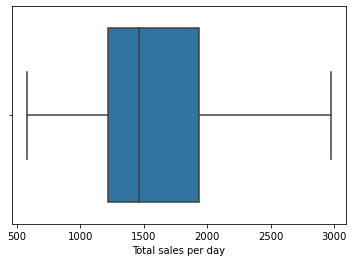

In [387]:
ax = sns.boxplot(x=Ndf["Total sales per day"])
ax.set_xlabel('Total sales per day')

In [339]:
Ndf[Ndf['Total sales per day'].between(3000, 5000)]

,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura,NewDate,season,Weekday
28,3363.0,77,54,0,2019-12-30,3,1
29,4863.0,82,42,6,2019-12-31,3,2
67,3447.0,106,9,21,2020-02-08,3,6
95,3137.0,108,67,0,2020-03-07,3,6
157,3155.0,251,137,0,2020-05-09,0,6


Above you see the 4/5 outliers. The biggest outlier you see in the prediction and the boxplot is the one on new years eve. Now lets take a look if that has to do with the sales of deep fried doughnut balls.


In [340]:
Odf = df.loc[:, ['Total sales per day', 'Oliebol Bake-Off', 'NewDate', 'Roombotercroissant bake-off']]
Odf

,Total sales per day,Oliebol Bake-Off,NewDate,Roombotercroissant bake-off
0,1538.0,0.0,2019-12-01,149.0
1,1263.0,0.0,2019-12-02,69.0
2,1265.0,0.0,2019-12-03,74.0
3,1509.0,0.0,2019-12-04,120.0
4,1748.0,0.0,2019-12-05,103.0
...,...,...,...,...
358,1498.0,0.0,2020-11-26,96.0
359,1776.0,0.0,2020-11-27,161.0
360,2189.0,0.0,2020-11-28,176.0
361,1162.0,0.0,2020-11-29,86.0


In [341]:
Odf[Odf['Oliebol Bake-Off'].between(1000, 3000)]

,Total sales per day,Oliebol Bake-Off,NewDate,Roombotercroissant bake-off
28,3363.0,1209.0,2019-12-30,190.0
29,4863.0,2755.0,2019-12-31,95.0


In [342]:
Odf[Odf['Roombotercroissant bake-off'].between(800, 1000)]

,Total sales per day,Oliebol Bake-Off,NewDate,Roombotercroissant bake-off
67,3447.0,0.0,2020-02-08,963.0
156,2867.0,0.0,2020-05-08,939.0
157,3155.0,0.0,2020-05-09,841.0


Indeed the deep fried doughnut balls are the reason for this outlier since 56,7% of the "Total sales per day" on 31-12-2019 is deep fried doughnut balls. This is expected since THE pastry to eat on this holiday. 
The other outlier on the 8th of february was mainly because of the "Roomboter croissant Bake-off". This can be explained to the the fact that in this week there was a promotion of 5 croissant for €1,-.

Lets clean this data by taking out all value above 3000. 

In [343]:
Ndf['Total sales per day'] = df['Total sales per day'].apply(pd.to_numeric, errors='coerce')

def above_3000(x):
    if(x > 3000): 
        return float('NaN')
    else: 
        return x
df['Total sales per day'] = df['Total sales per day'].apply(above_3000)


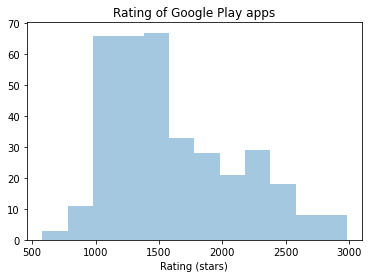

In [344]:
sns.distplot(df['Total sales per day'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Rating of Google Play apps')
plt.xlabel('Rating (stars)')
plt.show()

In [360]:
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

# Plotting Temperature + Total sales per day

In this chapter I will take a look at the correlation between the weather and the "Total sales per day". 

In [361]:
Ndf = df.loc[:, ['Total sales per day', 'Temp 0.1 graden', 'Sunshine dura', 'Rainfall dura', 'NewDate', 'season', 'Weekday']]
Ndf


,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura,NewDate,season,Weekday
0,1538.0,24,24,0,2019-12-01,2,0
1,1263.0,79,50,12,2019-12-02,2,1
2,1265.0,74,68,0,2019-12-03,2,2
3,1509.0,62,68,0,2019-12-04,2,3
4,1748.0,37,0,0,2019-12-05,2,4
...,...,...,...,...,...,...,...
358,1498.0,92,0,65,2020-11-26,2,4
359,1776.0,75,10,47,2020-11-27,2,5
360,2189.0,40,0,0,2020-11-28,2,6
361,1162.0,35,53,0,2020-11-29,2,0


Above I used the loc method to directly select variable and putting them together in a new dataframe called "Ndf"

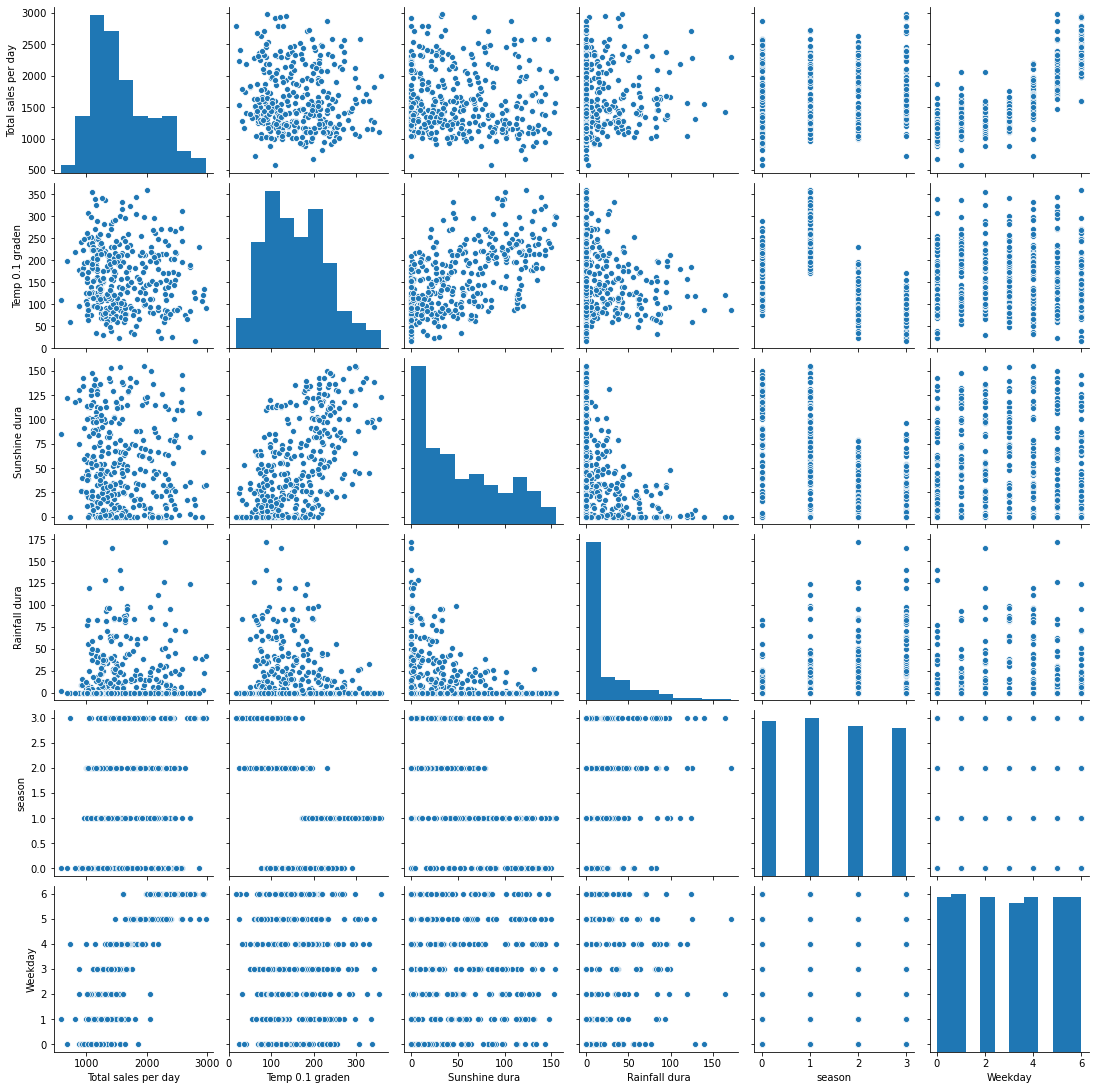

In [362]:
sns.pairplot(Ndf)
plt.show()

The scatterplot shows that the weather does not strongly correlate. The dots are not that close.
The qualitative variables show a less clear picture. With a correlation matrix this could get more clear.

In [363]:
corr = Ndf[['Total sales per day', 'Temp 0.1 graden', 'Sunshine dura', 'Rainfall dura']].corr() 
corr

,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura
Total sales per day,1.000000,-0.079221,-0.101567,0.099065
Temp 0.1 graden,-0.079221,1.000000,0.568389,-0.232412
Sunshine dura,-0.101567,0.568389,1.000000,-0.501394
Rainfall dura,0.099065,-0.232412,-0.501394,1.000000


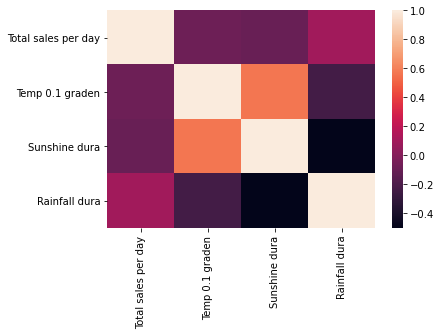

In [364]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

The correlations with Total sales per day are strongest with Weekday and season. It is interesting to that the "Total sales per day" and the "Temp 0.1 graden" + "Sunshine dura" have a negative correlation. Which means that when the temperature and sunshine duration increases the sales decrease. Whereas when the rainfall increases the sales also increase. However, the correlation is there but to close to 0.0 that it is basically not correlated. 
The output of scatterplot, the correlation matrix and heatmap clearly show that there is no significant correlation between the total sales per day and the weather (rainfall, sunshine and temperature). It does show that the weather variables are correlated with eachother. However this is not relevant for this research. 

# Linear regression Temperature + Total sales per day 

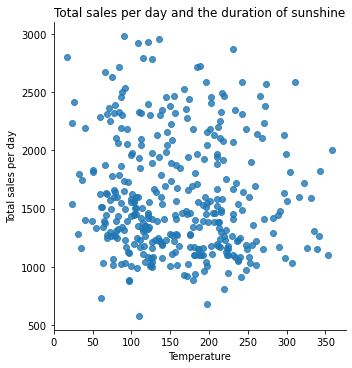

In [365]:
sns.lmplot(x='Temp 0.1 graden', y='Total sales per day', fit_reg=False, data=Ndf)
plt.title('Total sales per day and the duration of sunshine')
plt.xlabel("Temperature")
plt.ylabel("Total sales per day")
plt.show()

1. As suspected there is no real linear pattern. You can not draw a straight line to fit the points.
2. There is a lot of variation around the imaginable line, under the line as well as above this line. 
3. The higher the temperature the lower the sales. There is a negative correlation.

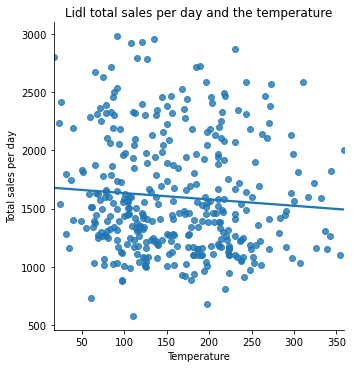

In [366]:
sns.lmplot(x='Temp 0.1 graden', y='Total sales per day', data=Ndf, ci=False) 
plt.title('Lidl total sales per day and the temperature')
plt.xlabel('Temperature')
plt.ylabel('Total sales per day')
plt.show()

This is a very weird line. This could be because the correlation is not significant or strong enough. 

In [367]:
from sklearn.linear_model import LinearRegression

x = Ndf[['Temp 0.1 graden']] 
y = Ndf[['Total sales per day']] 
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_
b1 = lm.coef_[0]

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X")

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [244]:
Ndf['Total sales per day_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
Ndf.head(10)

,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura,NewDate,season,Weekday,n_sales,Total sales per day_p
0,1538.0,24,24,0,2019-12-01,2,0,153.8,173.331302
1,1263.0,79,50,12,2019-12-02,2,1,126.3,169.053529
2,1265.0,74,68,0,2019-12-03,2,2,126.5,169.442417
3,1509.0,62,68,0,2019-12-04,2,3,150.9,170.375750
4,1748.0,37,0,0,2019-12-05,2,4,174.8,172.320192
5,2306.0,88,0,172,2019-12-06,2,5,230.6,168.353530
6,2531.0,92,2,21,2019-12-07,2,6,253.1,168.042419
7,1456.0,106,7,42,2019-12-08,2,0,145.6,166.953531
8,1394.0,80,23,39,2019-12-09,2,1,139.4,168.975751
9,1247.0,69,49,0,2019-12-10,2,2,124.7,169.831306


In [247]:
r2_score(Ndf['n_sales'], Ndf['Total sales per day_p'])

0.010307094811877637

In [248]:
math.sqrt(mean_squared_error(Ndf['n_sales'], Ndf['Total sales per day_p'])) 

55.10024154241195

In [249]:
Ndf['Total sales per day_p'] = lm.predict(x)
Ndf.head(10)

,Total sales per day,Temp 0.1 graden,Sunshine dura,Rainfall dura,NewDate,season,Weekday,n_sales,Total sales per day_p
0,1538.0,24,24,0,2019-12-01,2,0,153.8,173.331302
1,1263.0,79,50,12,2019-12-02,2,1,126.3,169.053529
2,1265.0,74,68,0,2019-12-03,2,2,126.5,169.442417
3,1509.0,62,68,0,2019-12-04,2,3,150.9,170.375750
4,1748.0,37,0,0,2019-12-05,2,4,174.8,172.320192
5,2306.0,88,0,172,2019-12-06,2,5,230.6,168.353530
6,2531.0,92,2,21,2019-12-07,2,6,253.1,168.042419
7,1456.0,106,7,42,2019-12-08,2,0,145.6,166.953531
8,1394.0,80,23,39,2019-12-09,2,1,139.4,168.975751
9,1247.0,69,49,0,2019-12-10,2,2,124.7,169.831306


# Linear Regression Season/Weekday + Total sales per day

In [99]:
y = df['Total sales per day'] 
X = df.loc[:,'season':'Weekday'] 
X.index = df['NewDate'] 
X.head()

,season,Weekday
NewDate,,
2019-12-01,2,0
2019-12-02,2,1
2019-12-03,2,2
2019-12-04,2,3
2019-12-05,2,4


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head() #The train data

,season,Weekday
NewDate,,
2020-04-13,0,1
2020-08-08,1,6
2020-01-23,3,4
2020-03-04,3,3
2020-04-06,0,1


In [146]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [147]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
55.162427,season
200.536283,Weekday


In [148]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.5164532756411235

In [149]:
math.sqrt(mean_squared_error(y_test, y_test_p))

440.9330317113699

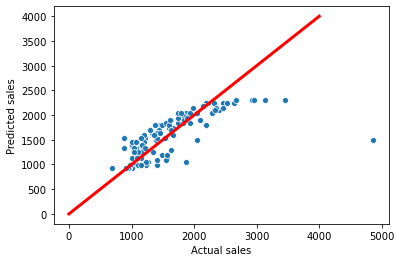

In [150]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.plot([0, 4000], [0, 4000], color='red', lw=3) #Plot a diagonal length
plt.show()

# RANDOM

In [96]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(Ndf['Sunshine dura'],df['Roombotercroissant bake-off']))
print(pearsonr(Ndf['Temp 0.1 graden'],df['Roombotercroissant bake-off']))
print(pearsonr(Ndf['Rainfall dura'],df['Roombotercroissant bake-off']))

(0.03516315260483184, 0.5042332100840271)
(-0.015471174597033049, 0.7689364085931714)
(0.02970179478191507, 0.5727079304626618)


In [97]:
print(pearsonr(Ndf['Sunshine dura'],df['Baguette wit bake-off']))
print(pearsonr(Ndf['Temp 0.1 graden'],df['Baguette wit bake-off']))
print(pearsonr(Ndf['Rainfall dura'],df['Baguette wit bake-off']))

(0.2018099724887365, 0.00010810405611185727)
(0.16157323304804852, 0.0020145367193250825)
(-0.07245252159111497, 0.16837136943159992)


To see if there is a correlation between individual pastries I selected two articles at random but with a high number of sales. The Croissant does not correlate with the weather. However the Baguette wit does have a higher correlation when it comes to Sunshine. Since the p = 0.001 it has a high correlation. This was however expected since baguette do sell better in the summer due to people having barbeques.  

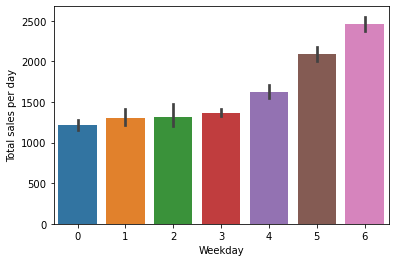

In [144]:
sns.barplot(x="Weekday", y="Total sales per day", data=df)